# Initial EDA

## Problem Statement

This capstone aims to build a regression model with Houston Rockets data in order to predict how many three-point field goals the Philadelphia 76ers make in the upcoming NBA season.

## EDA

The basketball_reference_scraper is a python package that helps aggregate statistics on NBA teams, seasons, players, and games in a more efficient way.

In [51]:
# Install basketball_reference_scraper

!pip install basketball-reference-scraper

In [52]:
!pip install unidecode

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import unidecode
from bs4 import BeautifulSoup

from basketball_reference_scraper.players import get_stats, get_game_logs
from basketball_reference_scraper.teams import get_roster, get_team_stats, get_opp_stats, get_roster_stats, get_team_misc

The 2017-2018 Houston Rockets is the team with the most 3-pointers made in an NBA season, with a total of 1,184 three-point field goals. Because of this, data from each player on the 17-18 Rockets will be scraped.

Disclaimer: the code below is a work in progress, so there are still errors I have to fix.

In [54]:
rockets_17_18_roster = ['Ryan Anderson', 'Trevor Ariza', 'Tarik Black',
                        'Bobby Brown', 'Markel Brown', 'Isaiah Canaan',
                        'Clint Capela', 'Eric Gordon', 'Gerald Green',
                        'James Harden', 'Nenê Hilário', 'R.J. Hunter',
                        'Aaron Jackson', 'Demetrius Jackson', 'Joe Johnson',
                        'Luc Mbah a Moute', 'Chinanu Onuaku', 'Chris Paul',
                        'Zhou Qi', 'Tim Quarterman', 'P.J. Tucker',
                        'Briante Weber', 'Troy Williams', 'Brandan Wright']

In [60]:
# Considering using game logs for data, so I will leave this for now
# get_game_logs('James Harden', '2017-10-17', '2018-04-11', playoffs=False)

In [56]:
# rockets_17_18_logs = pd.DataFrame(data=None, columns=['DATE', 'AGE', 'TEAM', 'HOME/AWAY', 'OPPONENT', 'RESULT', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GAME_SCORE', '+/-'])

In [57]:
# rockets_17_18_logs

,DATE,AGE,TEAM,HOME/AWAY,OPPONENT,RESULT,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GAME_SCORE,+/-


In [61]:
# # Aggregating 2017-2018 game logs for each Rockets player
# for player in rockets_17_18_roster:
#     log = get_game_logs(player, '2017-10-17', '2018-04-11', playoffs=False)
#     rockets_17_18_logs.append(log)

In [62]:
# get_game_logs("Clint Capela", '2017-10-17', '2017-10-18', playoffs=False)

In [63]:
rockets_17_18_df = get_roster_stats(team='HOU', season_end_year=2018, data_format='PER_GAME', playoffs=False)
rockets_17_18_df

,PLAYER,POS,AGE,TEAM,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SEASON
0,Ryan Anderson,PF,29,HOU,66,50,26.1,3.1,7.3,.431,...,1.4,3.6,5.0,0.9,0.4,0.3,0.6,1.9,9.3,2017-18
1,Trevor Ariza,SF,32,HOU,67,67,33.9,4.0,9.7,.412,...,0.5,3.9,4.4,1.6,1.5,0.2,0.8,2.0,11.7,2017-18
2,Tarik Black,C,26,HOU,51,2,10.5,1.5,2.5,.591,...,1.2,2.0,3.2,0.3,0.4,0.6,0.7,2.1,3.5,2017-18
3,Bobby Brown,PG,33,HOU,20,0,5.8,1.0,2.9,.328,...,0.0,0.4,0.4,0.6,0.2,0.0,0.5,0.3,2.5,2017-18
4,Markel Brown,SG,26,HOU,4,0,7.8,0.5,1.8,.286,...,0.3,1.0,1.3,0.5,0.0,0.0,0.5,1.5,1.3,2017-18
5,Isaiah Canaan,SG,26,HOU,1,0,4.0,0.0,1.0,.000,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-18
6,Clint Capela,C,23,HOU,74,74,27.5,6.0,9.1,.652,...,3.3,7.6,10.8,0.9,0.8,1.9,1.4,2.5,13.9,2017-18
7,Eric Gordon,SG,29,HOU,69,30,31.2,6.0,14.1,.428,...,0.4,2.1,2.5,2.2,0.6,0.4,1.9,1.7,18.0,2017-18
8,Gerald Green,SG,32,HOU,41,2,22.7,4.1,10.1,.407,...,0.4,2.9,3.2,0.6,0.6,0.4,0.8,2.1,12.1,2017-18
9,James Harden,SG,28,HOU,72,72,35.4,9.0,20.1,.449,...,0.6,4.8,5.4,8.8,1.8,0.7,4.4,2.3,30.4,2017-18


In [64]:
rockets_17_18_df.columns

Index(['PLAYER', 'POS', 'AGE', 'TEAM', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'SEASON'],
      dtype='object')

In [65]:
roster_stats_col = ['AGE', 'G', 'GS', 'MP', 'FG', 'FGA',
                    'FG%', '3P', '3PA', '3P%', '2P', '2PA',
                    '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
                    'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
                    'PF', 'PTS']

In [66]:
for col in roster_stats_col:
    rockets_17_18_df[col] = pd.to_numeric(rockets_17_18_df[col])

rockets_17_18_df.dtypes

PLAYER     object
POS        object
AGE         int64
TEAM       object
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
SEASON     object
dtype: object

In [67]:
rockets_17_18_df.isnull().sum()

PLAYER    0
POS       0
AGE       0
TEAM      0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       3
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       5
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
SEASON    0
dtype: int64

In [68]:
rockets_17_18_df['3P%'].fillna(0, inplace=True)
rockets_17_18_df['FT%'].fillna(0, inplace=True)
rockets_17_18_df.isnull().sum()

PLAYER    0
POS       0
AGE       0
TEAM      0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
SEASON    0
dtype: int64

#### Analyze the Numerical Data

In [69]:
rockets_17_18_num_df = rockets_17_18_df._get_numeric_data()

In [70]:
rockets_17_18_num_df

,AGE,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,29,66,50,26.1,3.1,7.3,0.431,2.0,5.1,0.386,...,0.774,1.4,3.6,5.0,0.9,0.4,0.3,0.6,1.9,9.3
1,32,67,67,33.9,4.0,9.7,0.412,2.5,6.9,0.368,...,0.854,0.5,3.9,4.4,1.6,1.5,0.2,0.8,2.0,11.7
2,26,51,2,10.5,1.5,2.5,0.591,0.0,0.2,0.091,...,0.460,1.2,2.0,3.2,0.3,0.4,0.6,0.7,2.1,3.5
3,33,20,0,5.8,1.0,2.9,0.328,0.6,2.0,0.275,...,0.500,0.0,0.4,0.4,0.6,0.2,0.0,0.5,0.3,2.5
4,26,4,0,7.8,0.5,1.8,0.286,0.3,1.3,0.200,...,0.000,0.3,1.0,1.3,0.5,0.0,0.0,0.5,1.5,1.3
5,26,1,0,4.0,0.0,1.0,0.000,0.0,0.0,0.000,...,0.000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,23,74,74,27.5,6.0,9.1,0.652,0.0,0.0,0.000,...,0.560,3.3,7.6,10.8,0.9,0.8,1.9,1.4,2.5,13.9
7,29,69,30,31.2,6.0,14.1,0.428,3.2,8.8,0.359,...,0.809,0.4,2.1,2.5,2.2,0.6,0.4,1.9,1.7,18.0
8,32,41,2,22.7,4.1,10.1,0.407,2.7,7.3,0.369,...,0.850,0.4,2.9,3.2,0.6,0.6,0.4,0.8,2.1,12.1
9,28,72,72,35.4,9.0,20.1,0.449,3.7,10.0,0.367,...,0.858,0.6,4.8,5.4,8.8,1.8,0.7,4.4,2.3,30.4


#### Drop Columns Deemed Unnecessary

In [71]:
rockets_17_18_num_df.drop(['AGE', 'GS', 'eFG%', 'ORB', 'DRB', 'STL', 'BLK', 'TOV', 'PF'], axis=1, inplace=True)

In [72]:
rockets_17_18_num_df

,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,TRB,AST,PTS
0,66,26.1,3.1,7.3,0.431,2.0,5.1,0.386,1.2,2.1,0.539,1.1,1.4,0.774,5.0,0.9,9.3
1,67,33.9,4.0,9.7,0.412,2.5,6.9,0.368,1.5,2.8,0.519,1.1,1.3,0.854,4.4,1.6,11.7
2,51,10.5,1.5,2.5,0.591,0.0,0.2,0.091,1.5,2.3,0.638,0.6,1.2,0.460,3.2,0.3,3.5
3,20,5.8,1.0,2.9,0.328,0.6,2.0,0.275,0.4,0.9,0.444,0.1,0.1,0.500,0.4,0.6,2.5
4,4,7.8,0.5,1.8,0.286,0.3,1.3,0.200,0.3,0.5,0.500,0.0,0.0,0.000,1.3,0.5,1.3
5,1,4.0,0.0,1.0,0.000,0.0,0.0,0.000,0.0,1.0,0.000,0.0,0.0,0.000,1.0,0.0,0.0
6,74,27.5,6.0,9.1,0.652,0.0,0.0,0.000,6.0,9.1,0.653,1.9,3.5,0.560,10.8,0.9,13.9
7,69,31.2,6.0,14.1,0.428,3.2,8.8,0.359,2.9,5.2,0.544,2.8,3.5,0.809,2.5,2.2,18.0
8,41,22.7,4.1,10.1,0.407,2.7,7.3,0.369,1.4,2.8,0.504,1.2,1.5,0.850,3.2,0.6,12.1
9,72,35.4,9.0,20.1,0.449,3.7,10.0,0.367,5.4,10.1,0.531,8.7,10.1,0.858,5.4,8.8,30.4


In [73]:
rockets_17_18_num_df['3P'].describe()

count    24.000000
mean      0.941667
std       1.175813
min       0.000000
25%       0.000000
50%       0.450000
75%       1.550000
max       3.700000
Name: 3P, dtype: float64

In [74]:
rockets_17_18_num_df['3P'].value_counts()

0.0    9
0.3    2
0.6    2
1.0    2
2.5    2
1.4    1
3.2    1
0.7    1
2.7    1
3.7    1
0.1    1
2.0    1
Name: 3P, dtype: int64

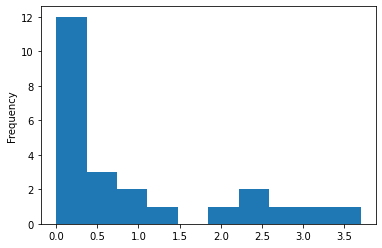

In [75]:
rockets_17_18_num_df['3P'].plot(kind='hist');

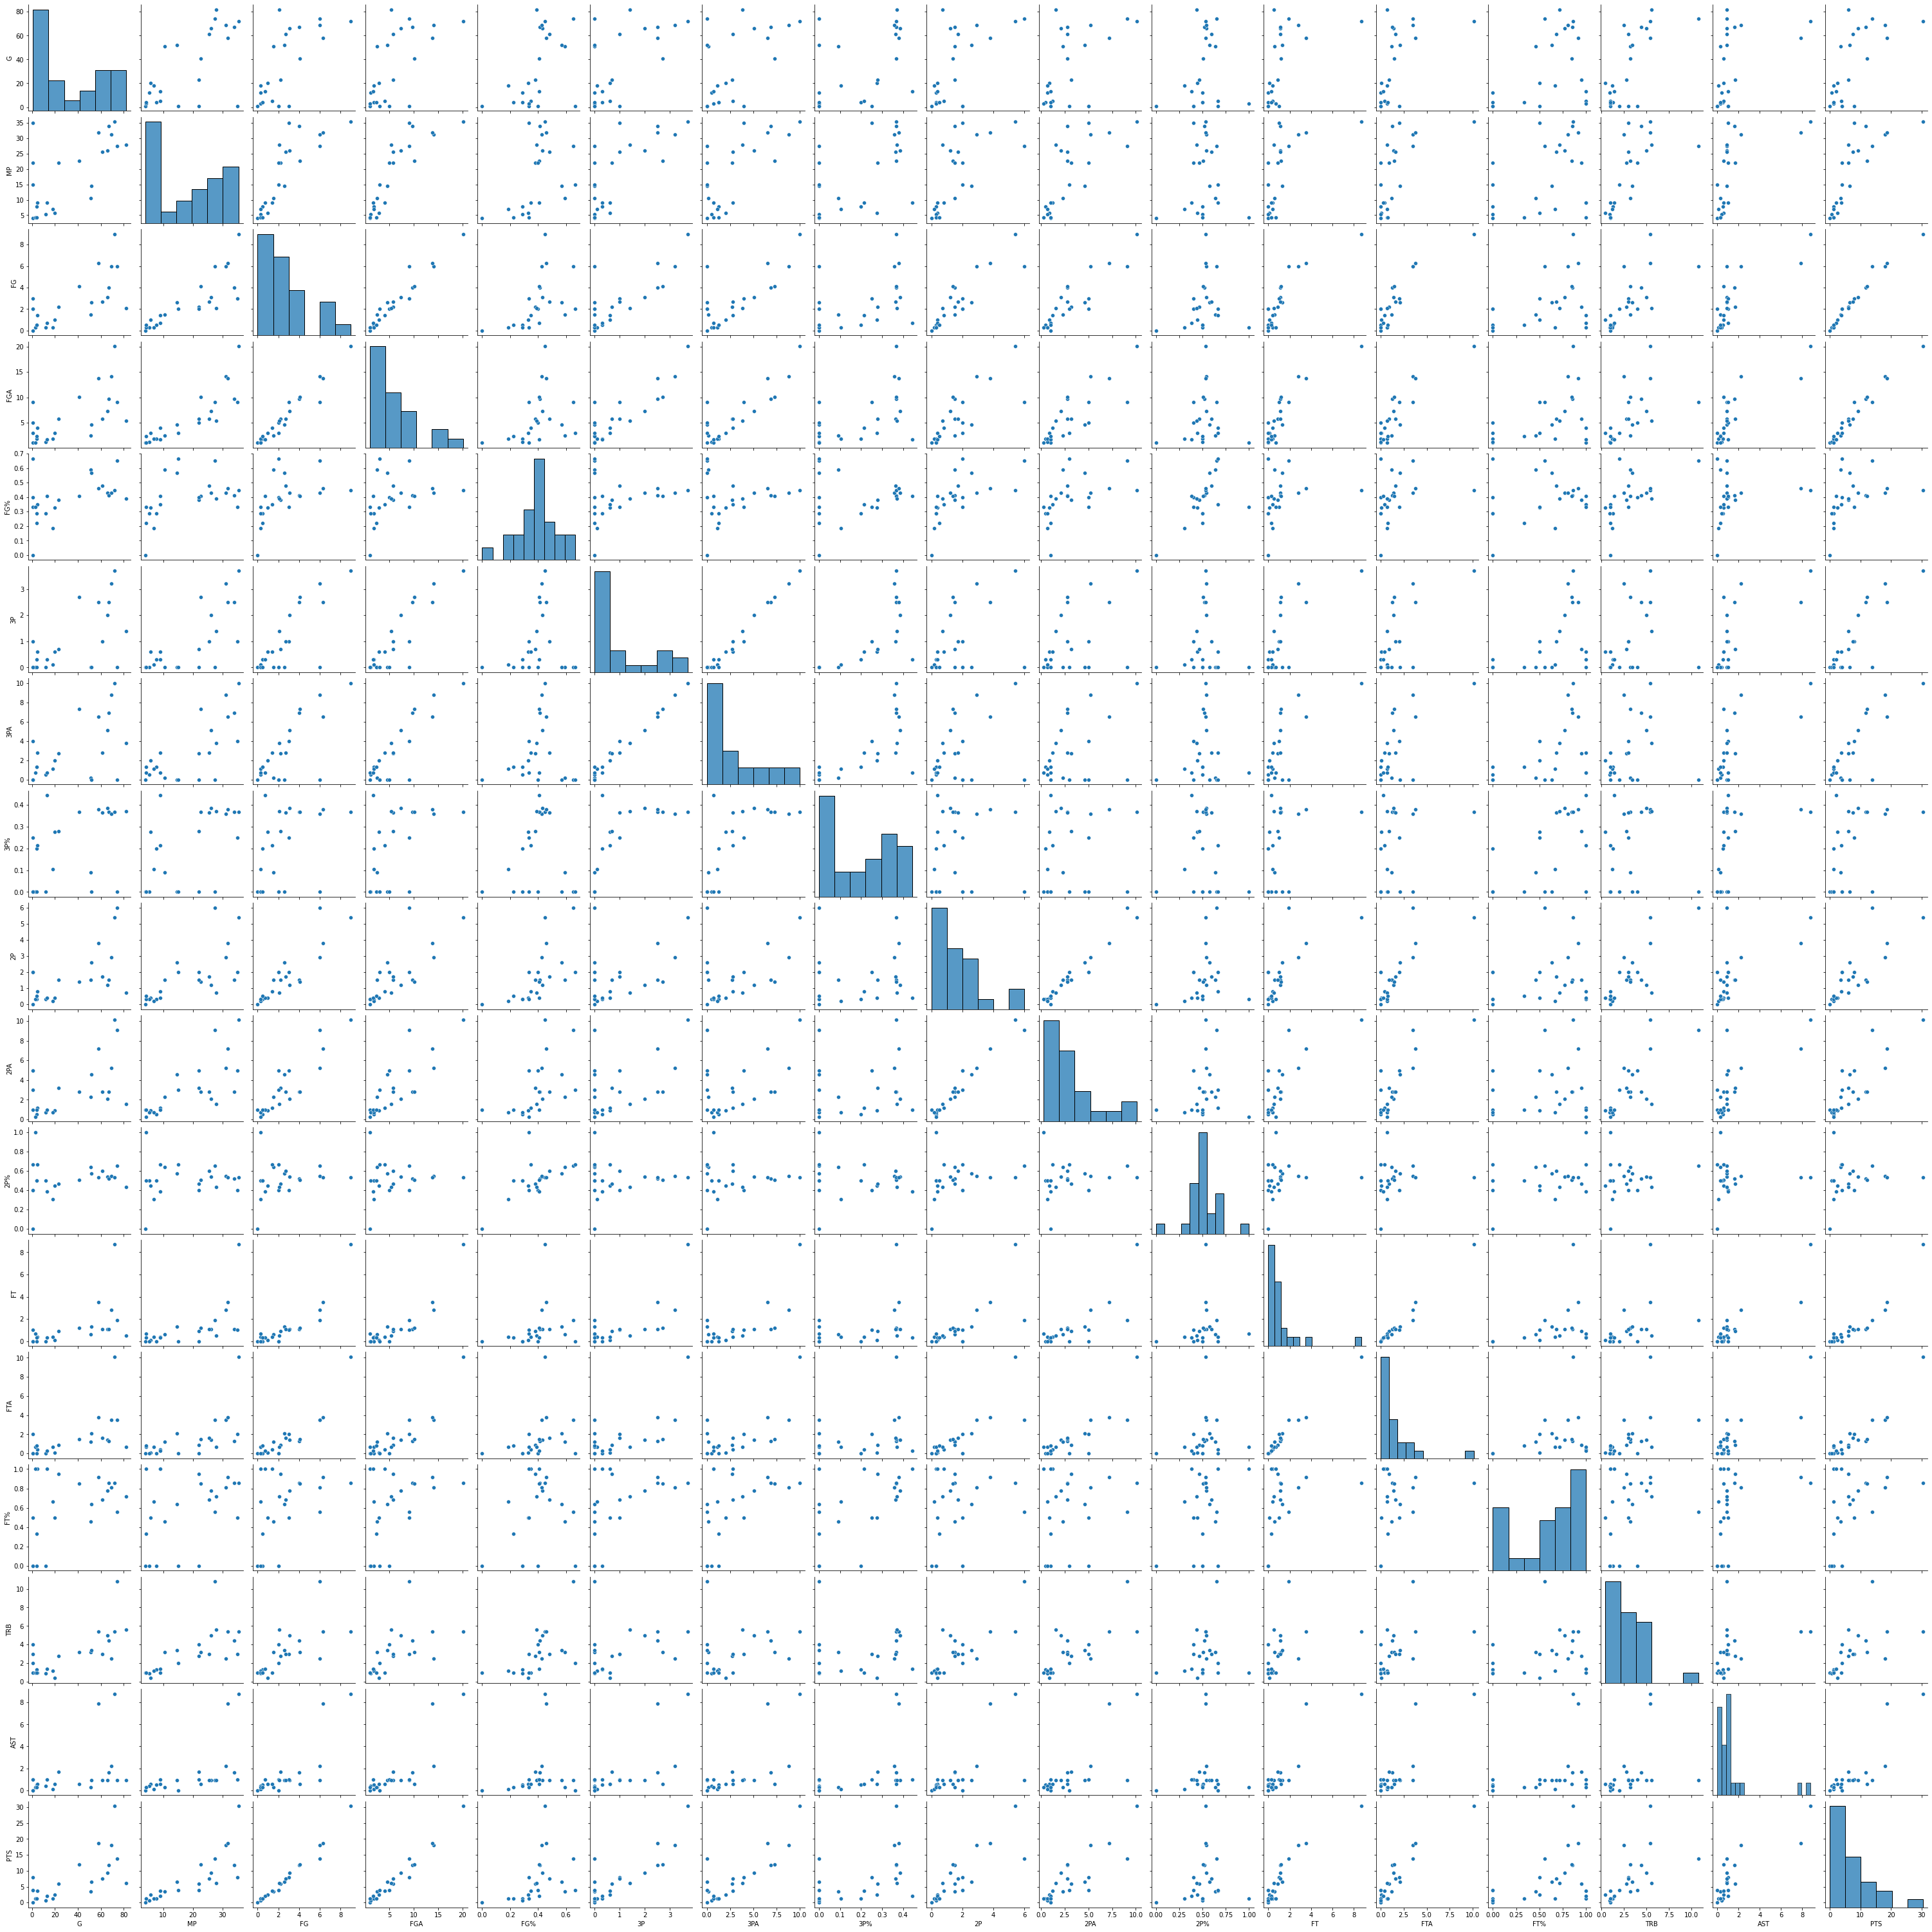

In [76]:
sns.pairplot(rockets_17_18_num_df);

<AxesSubplot:>

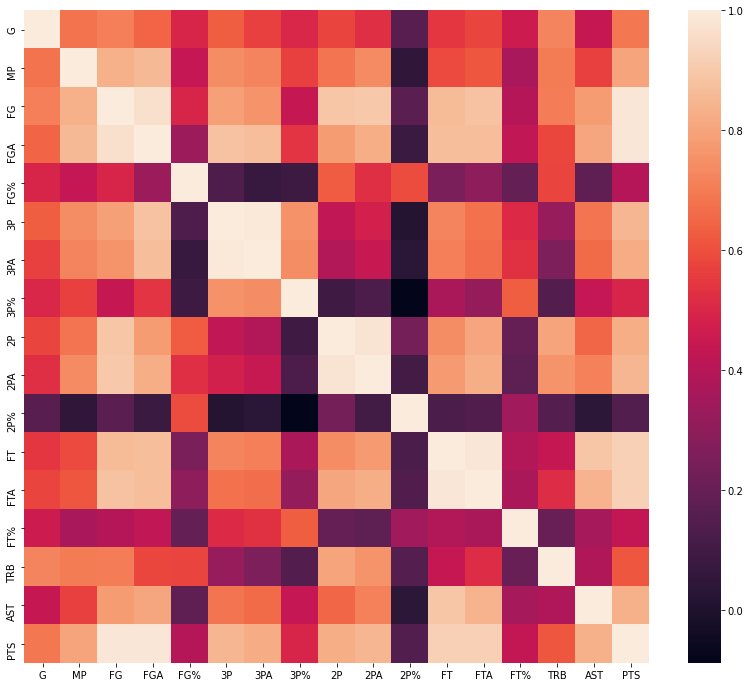

In [77]:
plt.figure(figsize=(14,12))
sns.heatmap(rockets_17_18_num_df.corr())

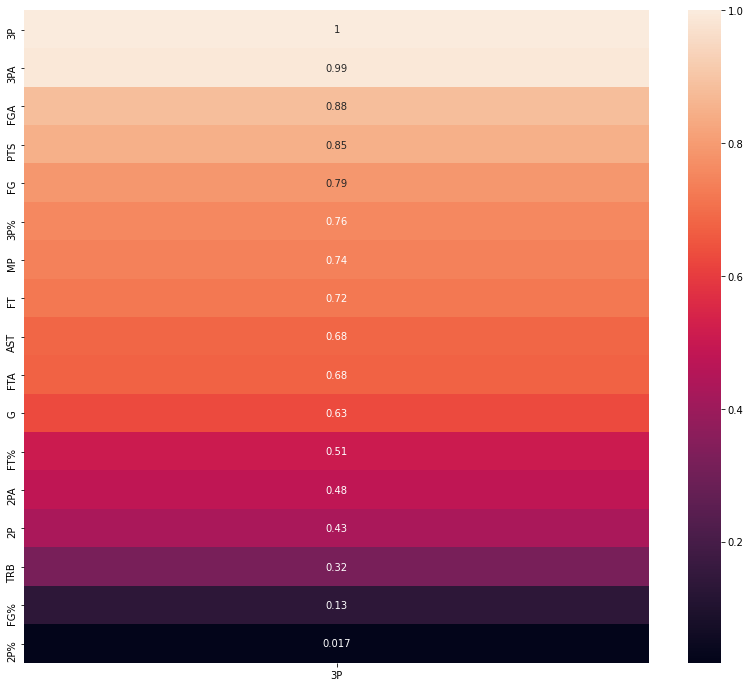

In [78]:
# Source: https://medium.com/@chrisshaw982/seaborn-correlation-heatmaps-customized-10246f4f7f4b

plt.figure(figsize=(14,12))
sns.heatmap(rockets_17_18_num_df.corr()[['3P']].sort_values('3P', ascending=False), annot=True);

## Sources
- https://www.basketball-reference.com/
- https://github.com/vishaalagartha/basketball_reference_scraper
- https://pypi.org/project/Unidecode/